## Observations and Insights 

In [37]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files

mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_combine = pd.merge(mouse_metadata, study_results, on = "Mouse ID")

# Display the data table for preview

data_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.

num_mice = len(data_combine['Mouse ID'].unique())
num_mice

249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = data_combine[data_combine.duplicated(['Mouse ID','Timepoint'], keep = False)]

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse_list = dup_mice['Mouse ID'].unique()

In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

for mouse in dup_mouse_list:
    cleaned_data = data_combine.drop(data_combine.index[data_combine['Mouse ID'] == mouse], inplace = False)

In [42]:
# Checking the number of mice in the clean DataFrame.

cleaned_mice = len(cleaned_data['Mouse ID'].unique())
cleaned_mice

248

## Summary Statistics

In [236]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugs_group_mean = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2)
drugs_group_median = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2)
drugs_group_std = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2)
drugs_group_var = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2)
drugs_group_sem = round(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),2)

drug_combine = pd.merge(drugs_group_mean, drugs_group_median, on = 'Drug Regimen')
drug_combine_two = pd.merge(drug_combine, drugs_group_var, on = 'Drug Regimen')

drug_combine_two_renamed = drug_combine_two.rename(columns={'Tumor Volume (mm3)_x' : 'Mean Tumor Volume (mm3)',
                                                            'Tumor Volume (mm3)_y' : 'Median Tumor Volume (mm3)',
                                                            'Tumor Volume (mm3)' : 'Variance Tumor Volume (mm3)'})

drug_combine_three = pd.merge(drug_combine_two_renamed, drugs_group_std, on = 'Drug Regimen')
drug_combine_all = pd.merge(drug_combine_three, drugs_group_sem, on = 'Drug Regimen')

all_drugs_renamed = drug_combine_all.rename(columns={'Tumor Volume (mm3)_x' : 'Std Deviation Tumor Volume (mm3)',
                                                     'Tumor Volume (mm3)_y' : 'SEM Tumor Volume (mm3)'})
all_drugs_renamed

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

one_line_stat =(cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([('Mean Tumor Volume (mm3)','mean'), ('Median Tumor Volume (mm3)','median'), ('Variance Tumor Volume (mm3)', 'var'), ('Std Deviation Tumor Volume (mm3)', 'std'), ('SEM Tumor Volume (mm3)', 'sem')])).style.format('{0:,.2f}')
one_line_stat                 

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

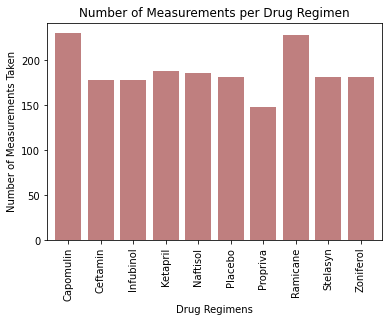

In [156]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_group = cleaned_data.groupby('Drug Regimen').count()
clean_group_needed = clean_group[['Mouse ID']]

clean_group_needed.plot(kind="bar", color = 'maroon', legend = False, alpha = 0.5, width = 0.8)

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

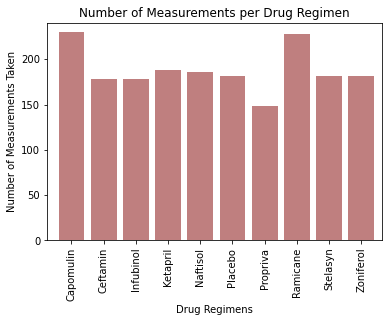

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = clean_group.index.to_list()
y_axis = clean_group['Mouse ID'].to_list()

plt.bar(x_axis, y_axis, color='maroon', alpha=0.5, align='center')

plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis) - 0.35)
plt.ylim(0, max(y_axis)+10)

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements Taken")

plt.show()

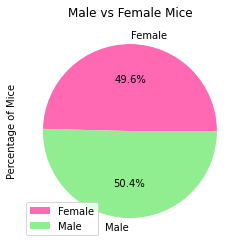

In [144]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_groups_gender = cleaned_data[['Sex','Mouse ID']]
mouse_groups_gender_drop = mouse_groups_gender.drop_duplicates(subset = 'Mouse ID', keep = 'first', inplace = False)
mouse_gender = mouse_groups_gender_drop.groupby('Sex').count()

mouse_pie = mouse_gender.plot(kind='pie', y = 'Mouse ID', title='Male vs Female Mice', autopct=''%1.1f%%'', colors = ['hotpink', 'lightgreen'])
mouse_pie.set_ylabel('Percentage of Mice')
mouse_pie.legend(loc = 'lower left')

plt.show()

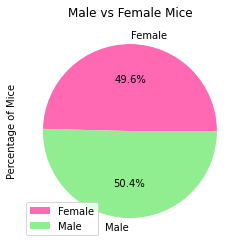

In [177]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = mouse_gender.index

plt.pie(mouse_gender['Mouse ID'], labels = labels, autopct='%1.1f%%', colors = ['hotpink', 'lightgreen'])
plt.title('Male vs Female Mice')
plt.ylabel('Percentage of Mice')
plt.legend(loc = 'lower left')

plt.show()

## Quartiles, Outliers and Boxplots

In [186]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

cleaned_data_sorted = cleaned_data.sort_values(['Mouse ID', 'Timepoint'], ascending=False)
cleaned_data_sorted_drop = cleaned_data_sorted.drop_duplicates(subset = 'Mouse ID', keep = 'first', inplace = False)
cleaned_data_resorted = cleaned_data_sorted_drop.sort_values('Mouse ID', ascending=True)
cleaned_data_resorted

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
483,a262,Placebo,Female,17,29,45,70.717621,4
493,a275,Ceftamin,Female,20,28,45,62.999356,3
500,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
1862,z435,Propriva,Female,12,26,10,48.710661,0
84,z578,Ramicane,Male,11,16,45,30.638696,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [190]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

for drug in treatments:
    current_drug = cleaned_data_resorted[cleaned_data_resorted['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol.append(current_drug.to_list())
    quartiles = current_drug.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Drug Summary for {drug}')
    print('-----------------------------------')
    print(f'The lower quartile of {drug} is: {lowerq:.2f}')
    print(f'The upper quartile of {drug} is: {upperq:.2f}')
    print(f'The interquartile range of {drug} is: {iqr:.2f}')
    print(f'The the median of {drug} is: {quartiles[0.5]:.2f}')
    print(f'Values below {lower_bound:.2f} could be outliers.')
    print(f'Values above {upper_bound:.2f} could be outliers.\n')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Drug Summary for Capomulin
-----------------------------------
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13
Values below 20.70 could be outliers.
Values above 51.83 could be outliers.

Drug Summary for Ramicane
-----------------------------------
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.10
The the median of Ramicane is: 36.56
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Drug Summary for Infubinol
-----------------------------------
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.

Drug Summary for Ceftamin
-----------------------------------
The lower quartile

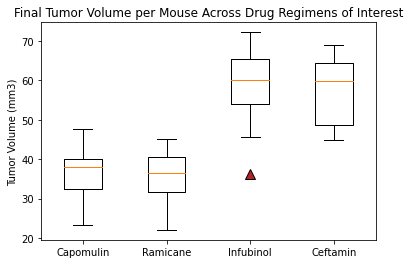

In [223]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

outliers = dict(markerfacecolor='firebrick', marker='^', markersize=10)

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Mouse Across Drug Regimens of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, flierprops = outliers, labels=treatments)
plt.show()

## Line and Scatter Plots

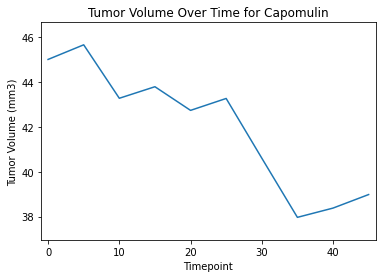

In [215]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.

# Reorganized data set to show every Mouse ID that had been given Capomulin to know which Mouse ID's data was relevent
# to pull to generate line plot.

cleaned_data_cap = cleaned_data.loc[cleaned_data['Drug Regimen'] == 'Capomulin']
cleaned_data_cap_drop = cleaned_data_cap.drop_duplicates(subset='Mouse ID', keep = 'first', inplace=False)

# Creating lists for the tumor volumes and timepoints for a specified Mouse ID treated with Capomulin.

tumors = cleaned_data.loc[cleaned_data['Mouse ID'] == 'b128']['Tumor Volume (mm3)'].to_list()
times = cleaned_data.loc[cleaned_data['Mouse ID'] == 'b128']['Timepoint'].to_list()

plt.plot(times, tumors)
plt.title('Tumor Volume Over Time for Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(-1, max(times)+1)
plt.ylim(min(tumors)-1, max(tumors)+1)
plt.show()

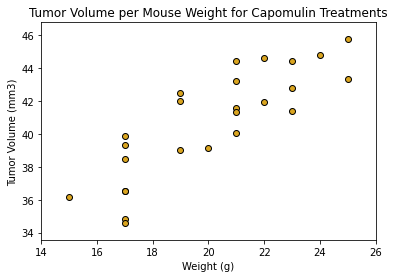

In [234]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cleaned_data_cap_mean = cleaned_data_cap.groupby('Mouse ID').mean()

avg_tumors = cleaned_data_cap_mean['Tumor Volume (mm3)']
weight = cleaned_data_cap_mean['Weight (g)']

plt.scatter(weight, avg_tumors, marker='o', facecolors='goldenrod', edgecolors='black')
plt.title('Tumor Volume per Mouse Weight for Capomulin Treatments')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(min(weight)-1, max(weight)+1)
plt.ylim(min(avg_tumors)-1, max(avg_tumors)+1)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
